# ***Setup***

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import astropy.units as u
import math
from astropy.cosmology import Planck15 
from astropy import constants as const
from scipy.integrate import odeint
from scipy.integrate import solve_ivp
import matplotlib.lines as mlines
import scipy.integrate as spi
from sklearn.metrics import mean_squared_error
import pandas as pd
from matplotlib.patches import Patch
from matplotlib.patches import Rectangle

In [ ]:
mm_mass_values = np.array([541340.0, 861230.0, 1230300.0, 1722500.0, 2780500.0, 3863200.0, 4945900.0, 5930200.0, 6766800.0, 7628000.0, 8636900.0, 9645800.0, 11221000.0, 13115000.0, 15871000.0, 20350000.0, 64814000.0, 76280000.0, 86935000.0, 91979000.0, 99287000.0, 104630000.0, 110340000.0, 117500000.0, 123840000.0, 127900000.0, 135780000.0, 144150000.0, 149210000.0, 155050000.0, 157730000.0, 165530000.0, 180100000.0, 188410000.0, 200100000.0, 204190000.0, 209480000.0, 203320000.0, 207190000.0, 213760000.0, 220500000.0, 241090000.0, 256550000.0, 266390000.0, 268240000.0, 267990000.0, 214000000.0, 249190000.0, 235160000.0, 193785000.0, 152410000.0, 174383300.0, 196356700.0, 218330000.0, 112430000.0, 105220000.0, 85803000.0, 49976000.0, 95695000.0, 48376000.0, 37254000.0, 36516000.0, 37673000.0, 34203000.0, 29060000.0, 25000000.0, 32013000.0, 25172000.0, 26280000.0, 25222000.0, 24090000.0, 23893000.0, 22638000.0, 22687000.0, 22761000.0, 23499000.0, 24434000.0, 75017000000.0, 78981000000.0, 82722000000.0, 86786000000.0, 91149000000.0, 94826000000.0, 95746000000.0, 98578000000.0, 101790000000.0, 104830000000.0, 107940000000.0, 111260000000.0, 115500000000.0, 119740000000.0, 124860000000.0, 130700000000.0, 136770000000.0, 142220000000.0, 146830000000.0, 150580000000.0, 154870000000.0, 158590000000.0, 158850000000.0, 159660000000.0, 162670000000.0, 166150000000.0, 169670000000.0, 173770000000.0, 177870000000.0, 181760000000.0, 185090000000.0, 187990000000.0, 190840000000.0, 194270000000.0, 198680000000.0, 202340000000.0, 205390000000.0, 210680000000.0, 214630000000.0, 218230000000.0, 221750000000.0, 225400000000.0, 229160000000.0, 233470000000.0, 238100000000.0, 242730000000.0, 247050000000.0, 251060000000.0, 255260000000.0, 259650000000.0, 263360000000.0, 266940000000.0, 270080000000.0, 273260000000.0, 276010000000.0, 278710000000.0, 281150000000.0, 281300000000.0])
mm_z_values = np.array([23.277739, 22.651846, 22.06273, 21.512383, 20.992523, 20.500753, 20.034918, 19.59308, 19.177563, 18.77848, 18.398642, 18.03674, 17.69159, 17.3621, 17.047283, 16.74623, 14.926104, 14.703518, 14.489467, 14.281174, 14.080681, 13.887598, 13.699397, 13.5180025, 13.34103, 13.170327, 13.003641, 12.84083, 12.685508, 12.5318, 12.383297, 12.239772, 12.099293, 11.961762, 11.828736, 11.698413, 11.57229, 11.448649, 11.327416, 11.210012, 11.094823, 10.983224, 10.872254, 10.764706, 10.660448, 10.558022, 10.457378, 10.359763, 10.262529, 10.16944, 10.076651, 9.986596, 9.897995, 9.810811, 9.726161, 9.642826, 9.560777, 9.481082, 9.40258, 9.325245, 9.249052, 9.175011, 9.10101, 9.029084, 8.9591675, 8.88924, 8.821253, 8.754194, 8.688983, 8.623713, 8.560229, 8.497578, 8.435742, 8.374707, 8.315324, 8.256688, 8.198786, 8.141603, 8.085953, 8.030976, 7.975855, 7.9229946, 7.8699665, 7.8605347, 7.817564, 7.766547, 7.716116, 7.6662617, 7.616976, 7.56898, 7.52079, 7.473858, 7.4274397, 7.381527, 7.336112, 7.291874, 7.248103, 7.2041187, 7.165265, 7.1612663, 7.153947, 7.119519, 7.077544, 7.036001, 6.995522, 6.9554496, 6.915776, 6.876497, 6.837605, 6.7990947, 6.7615647, 6.7243934, 6.686986, 6.651109, 6.6149864, 6.579202, 6.5437536, 6.509199, 6.474959, 6.4404764, 6.4074073, 6.3740873, 6.3410664, 6.3083386, 6.2764316, 6.2442765, 6.2129254, 6.181844, 6.1510296, 6.120478, 6.0901875, 6.0606513, 6.030865, 6.0018206, 5.9998603])

lw_mass_values = np.array([1131900.0, 2214600.0, 2755900.0, 3297300.0, 3444900.0, 4306100.0, 4798300.0, 5659500.0, 7037500.0, 9621200.0, 13509000.0, 15478000.0, 25591000.0, 29922000.0, 20522000.0, 23942000.0, 19513000.0, 16806000.0, 10039000.0, 10581000.0, 9202800.0, 18381000.0, 10975000.0, 13238000.0, 17864000.0, 251720000.0, 256970000.0, 259600000.0, 261590000.0, 262380000.0, 264990000.0, 276450000.0, 291220000.0, 306470000.0, 318580000.0, 322840000.0, 338340000.0, 343700000.0, 354700000.0, 549780000.0, 369910000.0, 390210000.0, 405490000.0, 411220000.0, 449190000.0, 458790000.0, 454730000.0, 468530000.0, 580150000.0, 470800000.0, 479850000.0, 433740000.0, 377960000.0, 431450000.0, 362530000.0, 346020000.0, 313460000.0, 377220000.0, 479313300.0, 581406700.0, 683500000.0, 894890000.0, 1110300000.0, 1184067000.0, 1257833000.0, 1331600000.0, 663540000.0, 748700000.0, 846540000.0, 647230000.0, 554630000.0, 428550000.0, 81257000000.0, 81876000000.0, 82253000000.0, 82969000000.0, 84271000000.0, 85603000000.0, 87617000000.0, 88156000000.0, 90867000000.0, 94602000000.0, 97834000000.0, 100850000000.0, 103940000000.0, 107830000000.0, 110930000000.0, 114320000000.0, 117170000000.0, 119930000000.0, 122610000000.0, 125540000000.0, 129070000000.0, 132740000000.0, 137540000000.0, 137860000000.0, 139210000000.0, 146200000000.0, 153720000000.0, 160420000000.0, 166230000000.0, 170750000000.0, 179570000000.0, 187040000000.0, 195460000000.0, 203910000000.0, 212980000000.0, 220930000000.0, 227430000000.0, 233470000000.0, 238680000000.0, 244040000000.0, 250030000000.0, 255910000000.0, 263230000000.0, 272610000000.0, 280990000000.0, 287110000000.0, 293210000000.0, 299550000000.0, 304390000000.0, 309730000000.0, 314190000000.0, 318610000000.0, 322940000000.0, 326860000000.0, 331130000000.0, 335680000000.0, 340240000000.0, 345590000000.0, 345590000000.0])
lw_z_values = np.array([20.992523, 20.500753, 20.034918, 19.59308, 19.177563, 18.77848, 18.398642, 18.03674, 17.69159, 17.3621, 17.047283, 16.74623, 14.926104, 14.703518, 14.489467, 14.281174, 14.080681, 13.887598, 13.699397, 13.5180025, 13.34103, 13.170327, 13.003641, 12.84083, 12.685508, 12.5318, 12.383297, 12.239772, 12.099293, 11.961762, 11.828736, 11.698413, 11.57229, 11.448649, 11.327416, 11.210012, 11.094823, 10.983224, 10.872254, 10.764706, 10.660448, 10.558022, 10.457378, 10.359763, 10.262529, 10.16944, 10.076651, 9.986596, 9.897995, 9.810811, 9.726161, 9.642826, 9.560777, 9.481082, 9.40258, 9.325245, 9.249052, 9.175011, 9.10101, 9.029084, 8.9591675, 8.88924, 8.821253, 8.754194, 8.688983, 8.623713, 8.560229, 8.497578, 8.435742, 8.374707, 8.315324, 8.256688, 8.198786, 8.141603, 8.085953, 8.030976, 7.975855, 7.9229946, 7.8699665, 7.8605347, 7.817564, 7.766547, 7.716116, 7.6662617, 7.616976, 7.56898, 7.52079, 7.473858, 7.4274397, 7.381527, 7.336112, 7.291874, 7.248103, 7.2041187, 7.165265, 7.1612663, 7.153947, 7.119519, 7.077544, 7.036001, 6.995522, 6.9554496, 6.915776, 6.876497, 6.837605, 6.7990947, 6.7615647, 6.7243934, 6.686986, 6.651109, 6.6149864, 6.579202, 6.5437536, 6.509199, 6.474959, 6.4404764, 6.4074073, 6.3740873, 6.3410664, 6.3083386, 6.2764316, 6.2442765, 6.2129254, 6.181844, 6.1510296, 6.120478, 6.0901875, 6.0606513, 6.030865, 6.0018206, 5.9998603])

In [ ]:
mm_M_i_z = 16.4
lw_M_i_z = 15.3

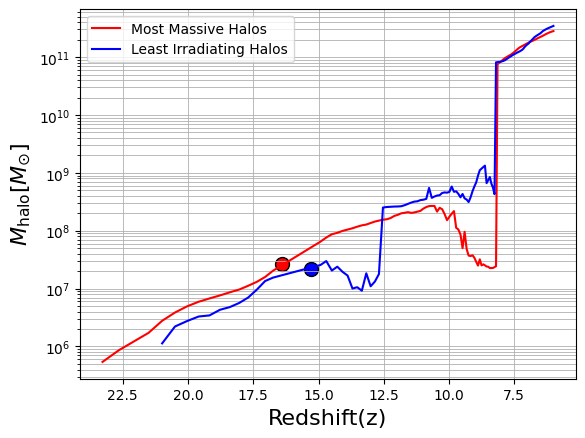

In [ ]:
plt.plot(mm_z_values, mm_mass_values , color='red', label='Most Massive Halos')
plt.plot(lw_z_values, lw_mass_values , color='blue', label='Least Irradiating Halos')
plt.scatter(mm_M_i_z, mm_mass_values[15]+0.6e7,color="red", edgecolors="black", s=100)
plt.scatter(lw_M_i_z, lw_mass_values[14]+1e6,color="blue", edgecolors="black", s=100)
plt.xlabel('Redshift(z)',fontsize = 16)
plt.gca().invert_xaxis()
plt.ylabel('$M_{\mathrm{halo}} [M_{\odot}]$',fontsize = 16)
plt.yscale('log')
plt.grid(True, which='both', linewidth=0.6)
plt.legend()
plt.show()

In [ ]:
M0 = 1.989e30 
Omm = 0.266
Omk = 0
Oml = 0.734
Delta_c = 1.686
Omb = 0.049
tau_fold = 20e6 # in yr
f_bh = 0.1
E = 0.1
mu = 0.6
p = 0.5
M_i = 1e4 



# ***Eddington Accretion***

In [ ]:
def t(z_values):  # in yr
    return 1e9 * Planck15.age(z_values) * u.Gyr ** -1

def Mbh(z_values, M_i, tau_fold):
    return M_i * np.exp(t(z_values) / tau_fold)

def M_halo(z_values, mass_values):
    return mass_values

def evolve_bh(z_values, mass_values, M_i, tau_fold, cap=True):
    total_baryons = f_bh * (Omb / Omm) * M_halo(z_values, mass_values)
    maximum_bh_mass = total_baryons
    bh_mass = [M_i]

    for x in range(len(z_values) - 1):
        current_time = t(z_values[x])
        next_time = t(z_values[x + 1])
        dt = next_time - current_time
        scale_factor = np.exp(dt / tau_fold)
        current_bh_mass = bh_mass[-1]

        # Add random fluctuations to the growth factor
        growth_factor = np.random.uniform(0.9, 1.1)
        next_bh_mass = current_bh_mass * scale_factor * growth_factor

        if cap and next_bh_mass > maximum_bh_mass[x + 1]:
            next_bh_mass = maximum_bh_mass[x + 1]
        elif next_bh_mass <= current_bh_mass:  # Ensure strictly increasing black hole mass
            next_bh_mass = current_bh_mass + np.finfo(float).eps  # Add smallest representable value

        if next_bh_mass <= bh_mass[-1]:
            next_bh_mass = bh_mass[-1] + np.finfo(float).eps  # Add smallest representable value

        bh_mass.append(next_bh_mass)

    return np.array(bh_mass)

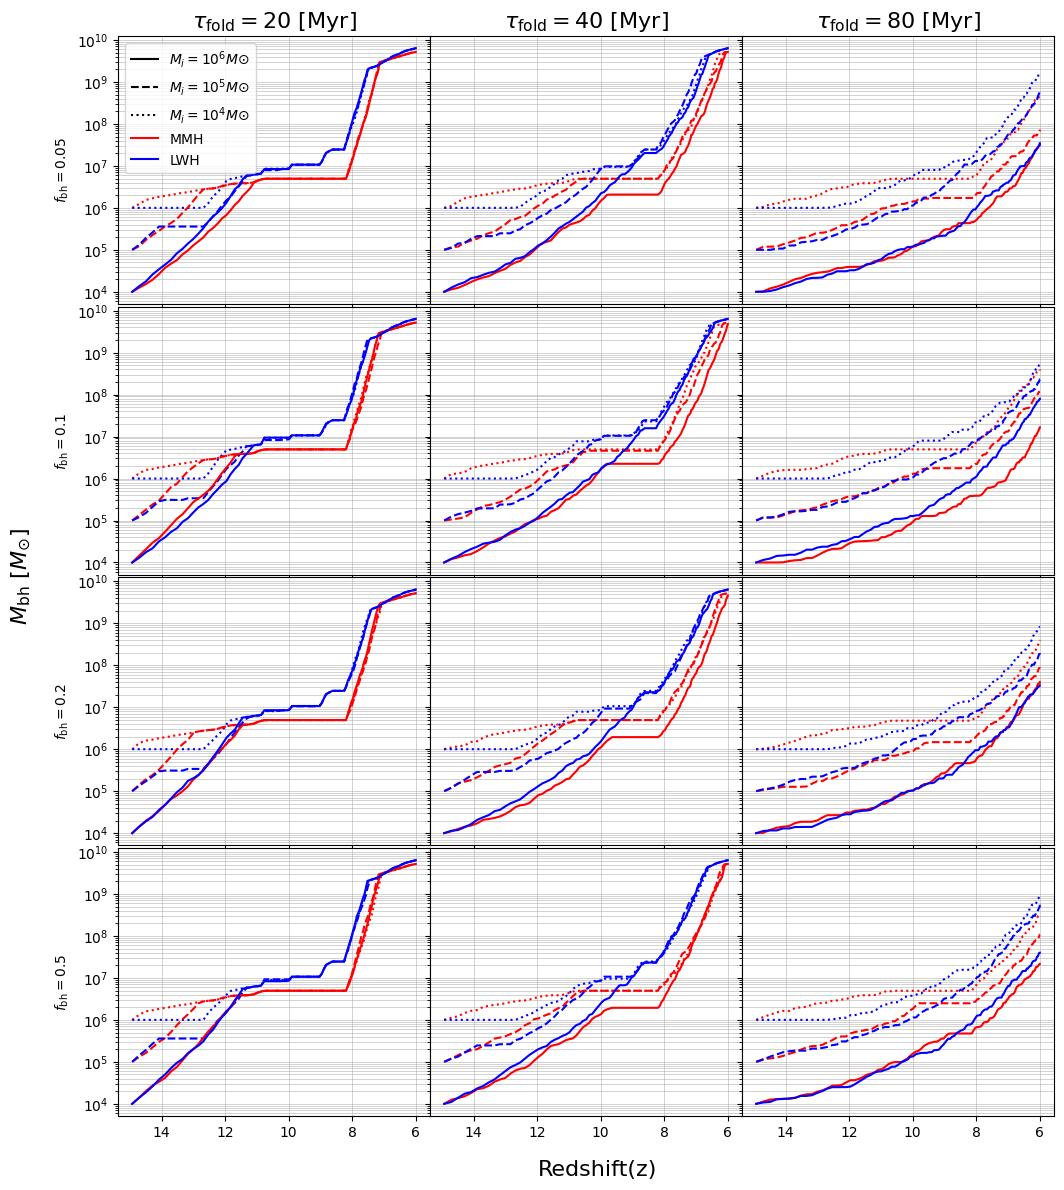

In [ ]:
fbh_values = [0.05, 0.1, 0.2, 0.5]
tau_fold_values = [20e6, 40e6, 80e6]
M_i_values = [1e6 , 1e5, 1e4]

fig, axes = plt.subplots(len(fbh_values), len(tau_fold_values), figsize=(12, 12), sharex=True, sharey=True)
mm_indices = np.where(mm_z_values < mm_M_i_z)
lw_indices = np.where(lw_z_values < lw_M_i_z)
colors = ['red', 'blue']

for i, fbh in enumerate(fbh_values):
    for j, tau_fold in enumerate(tau_fold_values):
        for idx, M_i in enumerate(M_i_values):
            mm_mass = evolve_bh(mm_z_values[mm_indices], M_halo(mm_z_values, mm_mass_values)[mm_indices], M_i, tau_fold)
            lw_mass = evolve_bh(lw_z_values[lw_indices], M_halo(lw_z_values, lw_mass_values)[lw_indices], M_i, tau_fold)
            linestyle = ['dotted', 'dashed', 'solid'][idx]
            axes[i, j].plot(mm_z_values[mm_indices], mm_mass, label=f"M_i={M_i:.0e}", color='red', linestyle=linestyle)
            axes[i, j].plot(lw_z_values[lw_indices], lw_mass, color='blue', linestyle=linestyle)
            axes[i, j].grid(True, which='both', linewidth=0.4)

        if j == 0:
            axes[i, j].set_ylabel(f"$f_{{\mathrm{{bh}}}} = {fbh}$", fontweight='bold')

        if i == 0:
            axes[i, j].set_title(f'$\\tau_{{\mathrm{{fold}}}} = {tau_fold / 1e6:.0f}$ [Myr]', fontsize=16)
        if i == 0 and j==0:    
            legend_elements = [Line2D([0], [0], color='black', linestyle='-'),
                               Line2D([0], [0], color='black', linestyle='--'),
                               Line2D([0], [0], color='black', linestyle=':'),
                               Line2D([0], [0], color='red', linestyle='-'),
                               Line2D([0], [0], color='blue', linestyle='-')]
            axes[i, j].legend(legend_elements, ['$M_i=10^6 M{\odot}$', '$M_i=10^5 M{\odot}$', '$M_i=10^4 M{\odot}$','MMH','LWH'], loc='upper left')

fig.text(0.5, 0, 'Redshift(z)', ha='center', fontsize=16)
fig.text(0.01, 0.5, '$M_{\mathrm{bh}} \ [M_{\odot}]$', va='center', rotation='vertical', fontsize=16)
plt.subplots_adjust(left=0.1, right=0.88, top=0.95, bottom=0.05, hspace=0.01, wspace=0)
plt.yscale('log')
plt.gca().invert_xaxis()
plt.show()


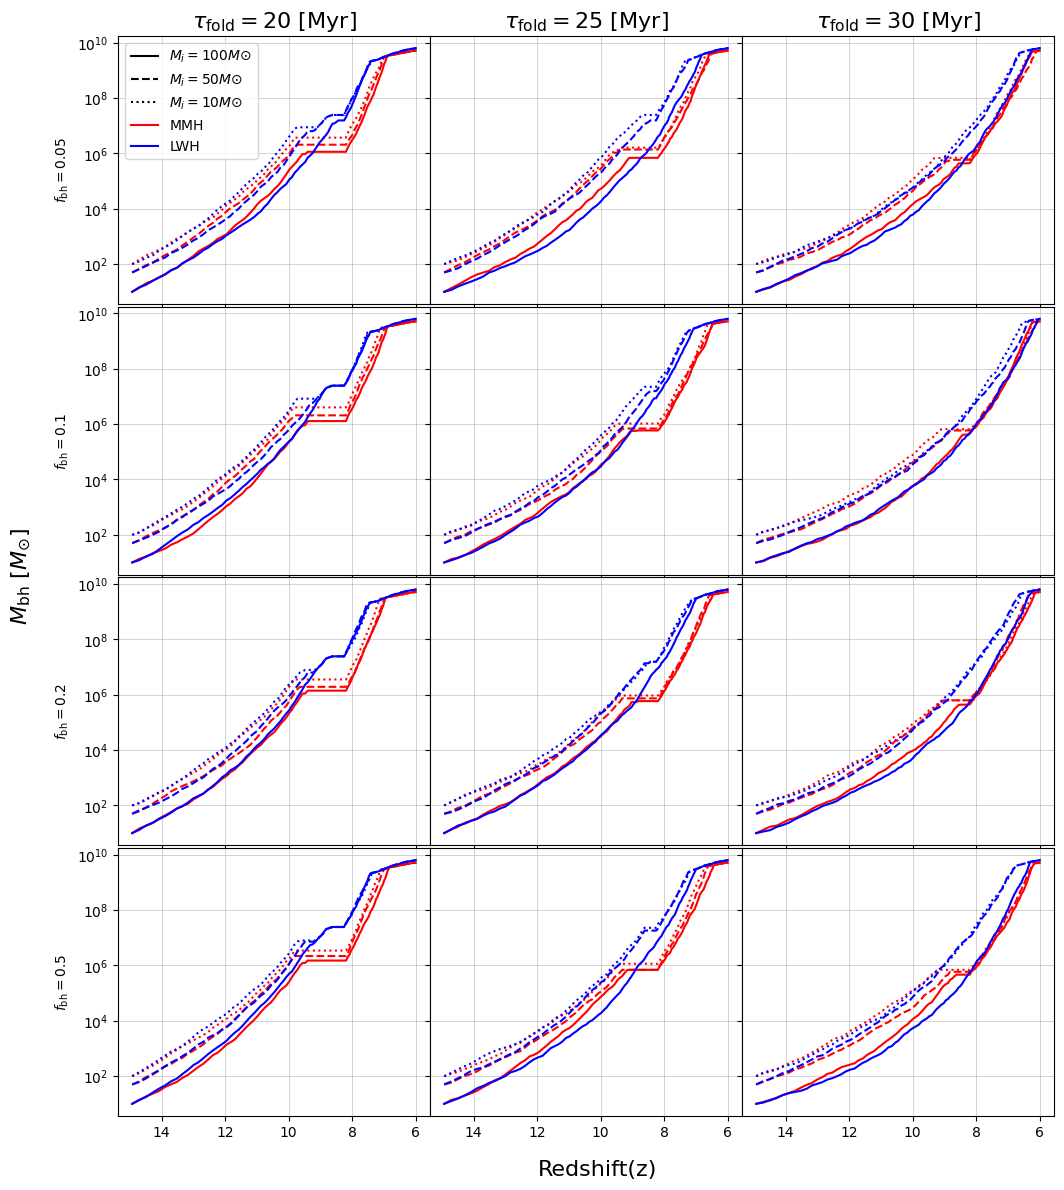

In [ ]:
fbh_values = [0.05, 0.1, 0.2, 0.5]
tau_fold_values = [20e6, 25e6, 30e6]
M_i_values = [100 , 50, 10]

fig, axes = plt.subplots(len(fbh_values), len(tau_fold_values), figsize=(12, 12), sharex=True, sharey=True)
mm_indices = np.where(mm_z_values < mm_M_i_z)
lw_indices = np.where(lw_z_values < lw_M_i_z)
colors = ['red', 'blue']

for i, fbh in enumerate(fbh_values):
    for j, tau_fold in enumerate(tau_fold_values):
        for idx, M_i in enumerate(M_i_values):
            mm_mass = evolve_bh(mm_z_values[mm_indices], M_halo(mm_z_values, mm_mass_values)[mm_indices], M_i, tau_fold)
            lw_mass = evolve_bh(lw_z_values[lw_indices], M_halo(lw_z_values, lw_mass_values)[lw_indices], M_i, tau_fold)
            linestyle = ['dotted', 'dashed', 'solid'][idx]
            axes[i, j].plot(mm_z_values[mm_indices], mm_mass, label=f"M_i={M_i:.0e}", color='red', linestyle=linestyle)
            axes[i, j].plot(lw_z_values[lw_indices], lw_mass, color='blue', linestyle=linestyle)
            axes[i, j].grid(True, which='both', linewidth=0.4)

        if j == 0:
            axes[i, j].set_ylabel(f"$f_{{\mathrm{{bh}}}} = {fbh}$", fontweight='bold')

        if i == 0:
            axes[i, j].set_title(f'$\\tau_{{\mathrm{{fold}}}} = {tau_fold / 1e6:.0f}$ [Myr]', fontsize=16)
        if i == 0 and j==0:    
            legend_elements = [Line2D([0], [0], color='black', linestyle='-'),
                               Line2D([0], [0], color='black', linestyle='--'),
                               Line2D([0], [0], color='black', linestyle=':'),
                               Line2D([0], [0], color='red', linestyle='-'),
                               Line2D([0], [0], color='blue', linestyle='-')]
            axes[i, j].legend(legend_elements, ['$M_i=100 M{\odot}$', '$M_i=50 M{\odot}$', '$M_i=10 M{\odot}$','MMH','LWH'], loc='upper left')

fig.text(0.5, 0, 'Redshift(z)', ha='center', fontsize=16)
fig.text(0.01, 0.5, '$M_{\mathrm{bh}} \ [M_{\odot}]$', va='center', rotation='vertical', fontsize=16)
plt.subplots_adjust(left=0.1, right=0.88, top=0.95, bottom=0.05, hspace=0.01, wspace=0)
plt.yscale('log')
plt.gca().invert_xaxis()
plt.show()


# ***uncapped***

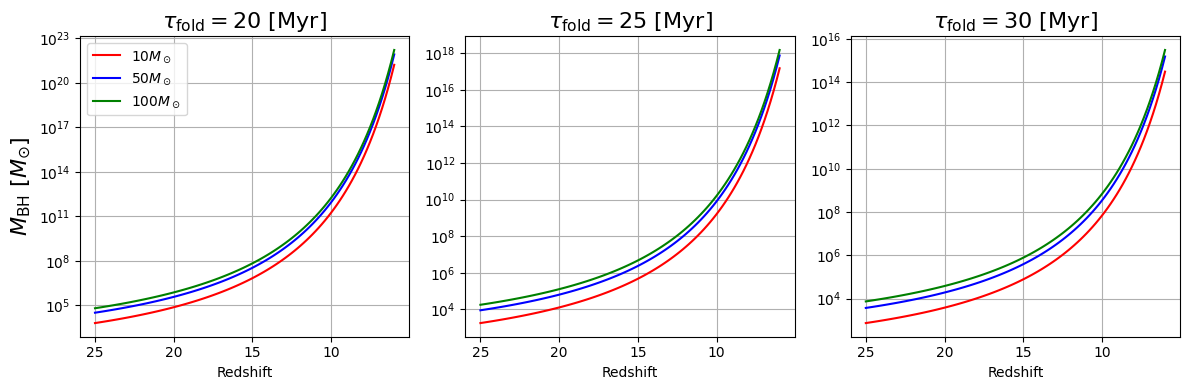

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
from astropy.cosmology import Planck15
from matplotlib.lines import Line2D

z_values = np.linspace(6, 25, 100)
M_i_values = [10, 50, 100]
tau_fold_values = [20e6, 25e6, 30e6]

def t(z_values):  # in yr
    return Planck15.age(z_values).to(u.yr).value
def Mbh(z_values, M_i_values, tau_fold):
    growth_rates = []
    for M_i in M_i_values:
        growth_rate = M_i * np.exp(t(z_values)[:, np.newaxis] / tau_fold)
        growth_rates.append(growth_rate)
    return growth_rates


fig, axes = plt.subplots(1, 3, figsize=(12, 4))  # Create subplots

colors = ['red', 'blue', 'green']
# Create legend labels with desired format
legend_labels = [f'$10 M_\odot$', f'$50 M_\odot$', f'$100 M_\odot$']
legend_elements = [Line2D([0], [0], color=color, label=label) for color, label in zip(colors, legend_labels)]

for i, tau_fold in enumerate(tau_fold_values):
    growth_rates = Mbh(z_values, M_i_values, tau_fold)
    growth_rates = np.array(growth_rates)

    ax = axes[i]
    for j, M_i in enumerate(M_i_values):
        ax.plot(z_values, growth_rates[j][:, 0], label=f'M_i = {M_i:.0e}', color=colors[j])


    ax.set_xlabel('Redshift')
    if i == 0 and j == 0:
        ax.set_ylabel('Black Hole Growth Rate')
    ax.set_title(f'$\\tau_{{\mathrm{{fold}}}} = {tau_fold / 1e6:.0f}$ [Myr]', fontsize=16)
    ax.grid(True)
    ax.set_yscale('log')  # Set y-axis to logarithmic scale
    ax.invert_xaxis()  # Invert x-axis
    if tau_fold == 20e6:  # Include legend only for tau_fold = 20
        ax.legend(handles=legend_elements, loc='upper left')  # Specify handles argument
        ax.set_ylabel('$M_{\mathrm{BH}} \ [M_{\odot}]$', fontsize=16)

plt.tight_layout()
plt.show()


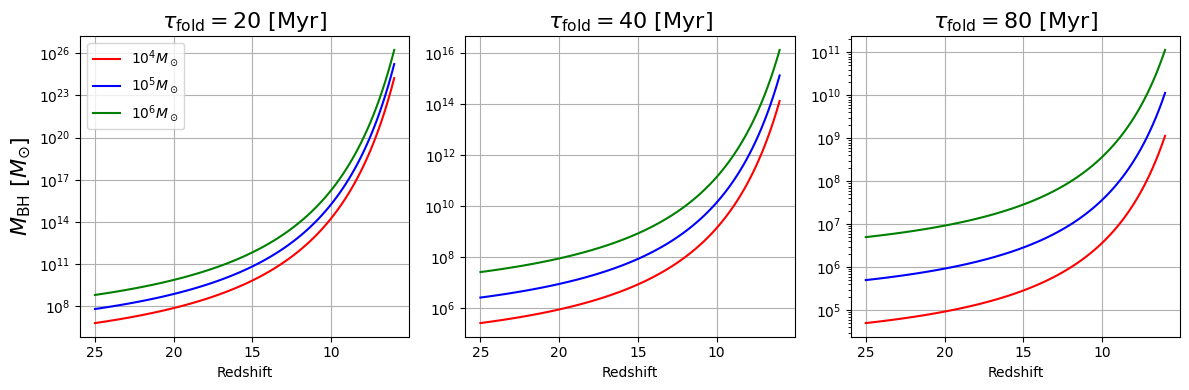

In [ ]:
z_values = np.linspace(6, 25, 100)
M_i_values = [1e4, 1e5, 1e6]
tau_fold_values = [20e6, 40e6, 80e6]

def t(z_values):  # in yr
    return Planck15.age(z_values).to(u.yr).value
def Mbh(z_values, M_i_values, tau_fold):
    growth_rates = []
    for M_i in M_i_values:
        growth_rate = M_i * np.exp(t(z_values)[:, np.newaxis] / tau_fold)
        growth_rates.append(growth_rate)
    return growth_rates


fig, axes = plt.subplots(1, 3, figsize=(12, 4))  # Create subplots

colors = ['red', 'blue', 'green']
# Create legend labels with desired format
legend_labels = [f'$10^4 M_\odot$', f'$10^5 M_\odot$', f'$10^6 M_\odot$']
legend_elements = [Line2D([0], [0], color=color, label=label) for color, label in zip(colors, legend_labels)]

for i, tau_fold in enumerate(tau_fold_values):
    growth_rates = Mbh(z_values, M_i_values, tau_fold)
    growth_rates = np.array(growth_rates)

    ax = axes[i]
    for j, M_i in enumerate(M_i_values):
        ax.plot(z_values, growth_rates[j][:, 0], label=f'M_i = {M_i:.0e}', color=colors[j])


    ax.set_xlabel('Redshift')
    if i == 0 and j == 0:
        ax.set_ylabel('Black Hole Growth Rate')
    ax.set_title(f'$\\tau_{{\mathrm{{fold}}}} = {tau_fold / 1e6:.0f}$ [Myr]', fontsize=16)
    ax.grid(True)
    ax.set_yscale('log')  # Set y-axis to logarithmic scale
    ax.invert_xaxis()  # Invert x-axis
    if tau_fold == 20e6:  # Include legend only for tau_fold = 20
        ax.legend(handles=legend_elements, loc='upper left')  # Specify handles argument
        ax.set_ylabel('$M_{\mathrm{BH}} \ [M_{\odot}]$', fontsize=16)

plt.tight_layout()
plt.show()


# ***Super-Eddington Accretion***

In [40]:
def calculate_dt(time):
    return np.array(time[1:len(time)]) - np.array(time[0:len(time)-1])

def calculate_dm(mass_values):
    return np.array(mass_values[1:len(mass_values)]) - np.array(mass_values[0:len(mass_values)-1])

def calculate_m_edd(tau_fold, bh_mass):
    return (1 / tau_fold) * bh_mass

def calculate_m_dot(F, Omb, Omm, dm, dt):
    m_dot = F * (Omb / Omm) * (dm / dt)
    if m_dot < 0:
        m_dot = 0
    return m_dot

def calculate_t_super(time, i, i_start):
    return time[i + 1] - time[i_start]

def calculate_m_dot_average(F, Omb, Omm, mass_values, i, i_start, t_super):
    return F * (Omb / Omm) * (mass_values[i + 1] - mass_values[i_start]) / t_super

def calculate_next_mass(m_dot_average, tau_fold, p, t_super, bh_mass, i_start):
    power_term = np.power(3 / (5 * tau_fold), p)
    next_mass = m_dot_average * np.power(power_term * t_super * (1 - p), 1 / (1 - p)) + bh_mass[i_start]
    return next_mass

def update_reset_power():
    reset_power = False

def calculate_bh_mass(next_mass, c, previous_mass):
    if next_mass <= c:
        return next_mass
    elif c > previous_mass:
        return c
    else:
        return previous_mass

def Mbh(mass_values, time, tau_fold, fbh, M_i):
    dt = calculate_dt(time)
    dm = calculate_dm(mass_values)
    reset_power = True
    cap = fbh * np.array(mass_values * Omb / Omm)
    t_super = 0

    bh_mass = []
    if M_i <= cap[0]:
        bh_mass.append(M_i)
    else:
        bh_mass.append(cap[0])

    for i in range(len(dt)):
        previous_mass = bh_mass[i]
        c = cap[i + 1]

        m_edd = calculate_m_edd(tau_fold, bh_mass[i])
        m_dot = calculate_m_dot(F, Omb, Omm, dm[i], dt[i])

        if 5 * m_dot > 3 * m_edd:
            if reset_power:
                i_start = i

            t_super = calculate_t_super(time, i, i_start)
            m_dot_average = calculate_m_dot_average(F, Omb, Omm, mass_values, i, i_start, t_super)
            next_mass = calculate_next_mass(m_dot_average, tau_fold, p, t_super, bh_mass, i_start)
            reset_power = False
        else:
            next_mass = m_dot * dt[i] + previous_mass
            reset_power = True

        bh_mass.append(calculate_bh_mass(next_mass, c, previous_mass))

    return bh_mass, cap

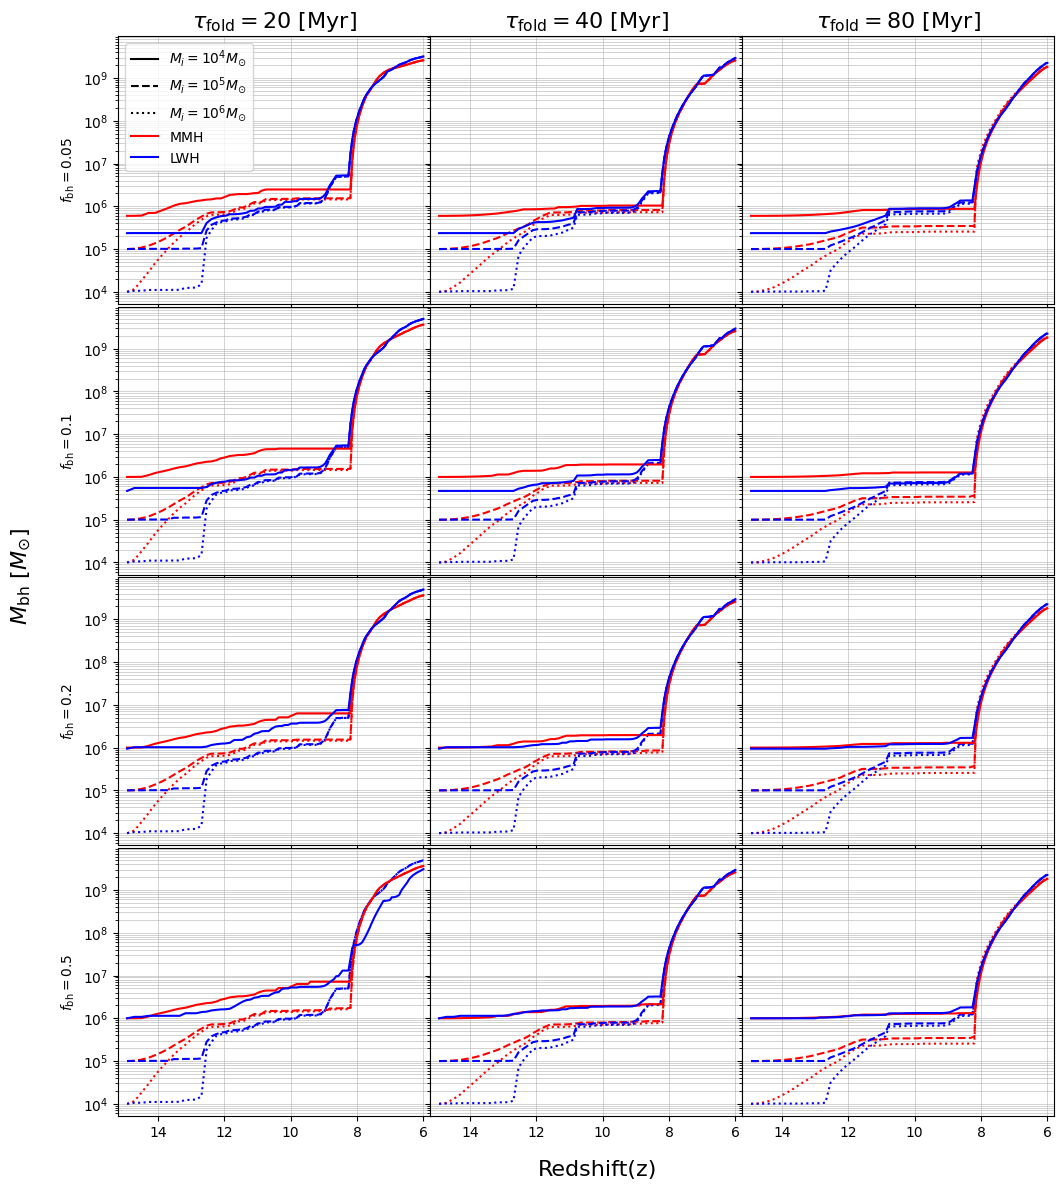

In [41]:
fbh_values = [0.05, 0.1, 0.2, 0.5]
M_i_values = [1e4, 1e5, 1e6]
tau_fold_values = [20e6, 40e6, 80e6]

p = 0.6
F = 0.1
mm_M_i_z = 16.4
lw_M_i_z = 15.3
Omm = 0.266
Omb = 0.049

mm_indices = np.where(mm_z_values < mm_M_i_z)
lw_indices = np.where(lw_z_values < lw_M_i_z)

fig, axes = plt.subplots(len(fbh_values), len(tau_fold_values), sharex=True, sharey=True, figsize=(12, 12))

for i, fbh in enumerate(fbh_values):
    for j, tau_fold in enumerate(tau_fold_values):
        for idx, M_i in enumerate(M_i_values):
            mm_bh_mass, mm_cap = Mbh(mm_mass_values[mm_indices], t(mm_z_values)[mm_indices], tau_fold_values[j], fbh_values[i], M_i)
            lw_bh_mass, lw_cap = Mbh(lw_mass_values[lw_indices], t(lw_z_values)[lw_indices], tau_fold_values[j], fbh_values[i], M_i)
            linestyle = ['dotted', 'dashed', 'solid'][idx]
            axes[i, j].plot(mm_z_values[mm_indices], mm_bh_mass, color="red", linestyle=linestyle)
            axes[i, j].plot(lw_z_values[lw_indices], lw_bh_mass, color="blue", linestyle=linestyle)
            axes[i, j].grid(True, which='both', linewidth=0.4)
            
        if j == 0:
            axes[i, j].set_ylabel(f"$f_{{\mathrm{{bh}}}} = {fbh}$", fontweight='bold')
        
        if i == 0:
            axes[i, j].set_title(f'$\\tau_{{\mathrm{{fold}}}} = {tau_fold / 1e6:.0f}$ [Myr]', fontsize=16)
        if i == 0 and j == 0:
            legend_elements = [
                Line2D([0], [0], color='black', linestyle='-'),
                Line2D([0], [0], color='black', linestyle='--'),
                Line2D([0], [0], color='black', linestyle=':'),
                Line2D([0], [0], color='red', linestyle='-'),
                Line2D([0], [0], color='blue', linestyle='-')
            ]
            axes[i, j].legend(legend_elements, ['$M_i=10^4 M_{\odot}$', '$M_i=10^5 M_{\odot}$', '$M_i=10^6 M_{\odot}$', 'MMH', 'LWH'], loc='upper left')

fig.text(0.5, 0, 'Redshift(z)', ha='center', fontsize=16)
fig.text(0.01, 0.5, '$M_{\mathrm{bh}} \ [M_{\odot}]$', va='center', rotation='vertical', fontsize=16)
plt.subplots_adjust(left=0.1, right=0.88, top=0.95, bottom=0.05, hspace=0.01, wspace=0)
plt.yscale('log')
plt.xlim(15.2, 5.8)
plt.show()


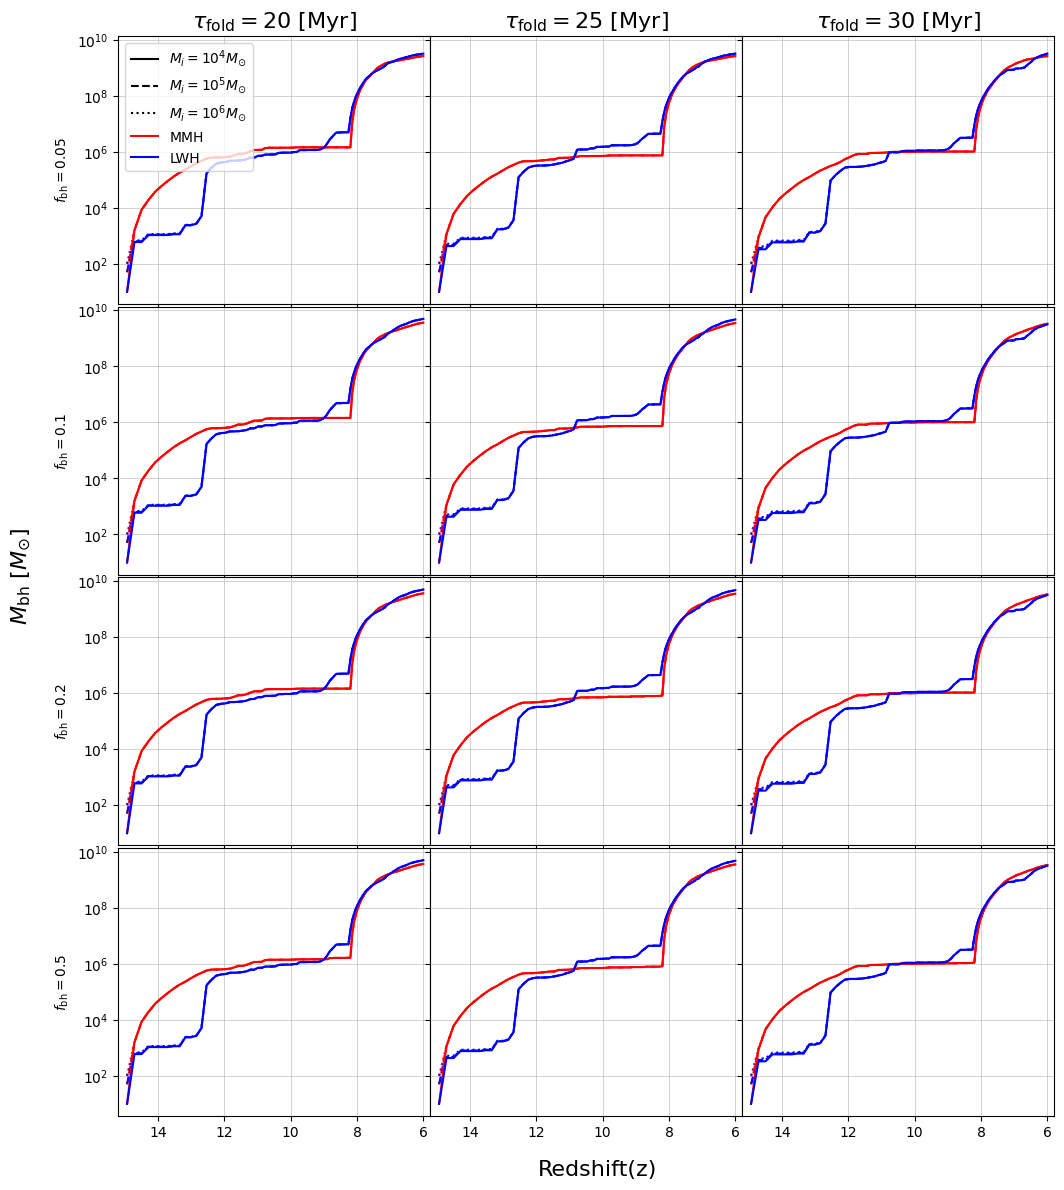

In [42]:
fbh_values = [0.05, 0.1, 0.2, 0.5]
M_i_values = [100, 50, 10]
tau_fold_values = [20e6, 25e6, 30e6]

fig, axes = plt.subplots(len(fbh_values), len(tau_fold_values), sharex=True, sharey=True, figsize=(12, 12))

for i, fbh in enumerate(fbh_values):
    for j, tau_fold in enumerate(tau_fold_values):
        for idx, M_i in enumerate(M_i_values):
            mm_bh_mass, mm_cap = Mbh(mm_mass_values[mm_indices], t(mm_z_values)[mm_indices], tau_fold_values[j], fbh_values[i], M_i)
            lw_bh_mass, lw_cap = Mbh(lw_mass_values[lw_indices], t(lw_z_values)[lw_indices], tau_fold_values[j], fbh_values[i], M_i)
            linestyle = ['dotted', 'dashed', 'solid'][idx]
            axes[i, j].plot(mm_z_values[mm_indices], mm_bh_mass, color="red", linestyle=linestyle)
            axes[i, j].plot(lw_z_values[lw_indices], lw_bh_mass, color="blue", linestyle=linestyle)
            axes[i, j].grid(True, which='both', linewidth=0.4)
            
        if j == 0:
            axes[i, j].set_ylabel(f"$f_{{\mathrm{{bh}}}} = {fbh}$", fontweight='bold')
        
        if i == 0:
            axes[i, j].set_title(f'$\\tau_{{\mathrm{{fold}}}} = {tau_fold / 1e6:.0f}$ [Myr]', fontsize=16)
        if i == 0 and j == 0:
            legend_elements = [
                Line2D([0], [0], color='black', linestyle='-'),
                Line2D([0], [0], color='black', linestyle='--'),
                Line2D([0], [0], color='black', linestyle=':'),
                Line2D([0], [0], color='red', linestyle='-'),
                Line2D([0], [0], color='blue', linestyle='-')
            ]
            axes[i, j].legend(legend_elements, ['$M_i=10^4 M_{\odot}$', '$M_i=10^5 M_{\odot}$', '$M_i=10^6 M_{\odot}$', 'MMH', 'LWH'], loc='upper left')

fig.text(0.5, 0, 'Redshift(z)', ha='center', fontsize=16)
fig.text(0.01, 0.5, '$M_{\mathrm{bh}} \ [M_{\odot}]$', va='center', rotation='vertical', fontsize=16)
plt.subplots_adjust(left=0.1, right=0.88, top=0.95, bottom=0.05, hspace=0.01, wspace=0)
plt.yscale('log')
plt.xlim(15.2, 5.8)
plt.show()

# ***Bondi–Hoyle–Lyttleton accretion***







In [ ]:
Omm = 0.266
Omk = 0
Oml = 0.734
Omb = 0.049
f = 0.1
G = 6.67430e-20 * (u.km**3) / (u.kg * u.s**2) 
M0 = 1.989e30 
gamma = 5 / 3  
R = 8.3145*1e-6 * (u.kg)*(u.km**2)*(u.K**-1)*(u.s**-2)*(u.mol**-1)  
molmass = 1.25*1e-3*u.kg/u.mol
mu = 0.6  
mp = 1.67e-27 * u.kg  
kb = 1.38e-29 *(u.kg)*(u.km**2)*(u.K**-1)*(u.s**-2) 
h = 700 * 30.9 * 1e15
H0 = 100*h*(u.s**-1)*(3*1e19)**-1
Mi = 1e4

In [ ]:
z = np.array([23.277739, 22.651846, 22.06273, 21.512383, 20.992523, 20.500753, 20.034918, 19.59308, 19.177563, 18.77848, 18.398642, 18.03674, 17.69159, 17.3621, 17.047283, 16.74623, 14.926104, 14.703518, 14.489467, 14.281174, 14.080681, 13.887598, 13.699397, 13.5180025, 13.34103, 13.170327, 13.003641, 12.84083, 12.685508, 12.5318, 12.383297, 12.239772, 12.099293, 11.961762, 11.828736, 11.698413, 11.57229, 11.448649, 11.327416, 11.210012, 11.094823, 10.983224, 10.872254, 10.764706, 10.660448, 10.558022, 10.457378, 10.359763, 10.262529, 10.16944, 10.076651, 9.986596, 9.897995, 9.810811, 9.726161, 9.642826, 9.560777, 9.481082, 9.40258, 9.325245, 9.249052, 9.175011, 9.10101, 9.029084, 8.9591675, 8.88924, 8.821253, 8.754194, 8.688983, 8.623713, 8.560229, 8.497578, 8.435742, 8.374707, 8.315324, 8.256688, 8.198786, 8.141603, 8.085953, 8.030976, 7.975855, 7.9229946, 7.8699665, 7.8605347, 7.817564, 7.766547, 7.716116, 7.6662617, 7.616976, 7.56898, 7.52079, 7.473858, 7.4274397, 7.381527, 7.336112, 7.291874, 7.248103, 7.2041187, 7.165265, 7.1612663, 7.153947, 7.119519, 7.077544, 7.036001, 6.995522, 6.9554496, 6.915776, 6.876497, 6.837605, 6.7990947, 6.7615647, 6.7243934, 6.686986, 6.651109, 6.6149864, 6.579202, 6.5437536, 6.509199, 6.474959, 6.4404764, 6.4074073, 6.3740873, 6.3410664, 6.3083386, 6.2764316, 6.2442765, 6.2129254, 6.181844, 6.1510296, 6.120478, 6.0901875, 6.0606513, 6.030865, 6.0018206, 5.9998603])

In [ ]:
def Omz(z):
    return (Omm * (1 + z)**3) / (Omm * (1 + z)**3 + Omk * (1 + z)**2 + Oml)

def d(z):
    return Omz(z) - 1

def Delta_c(z):
    return 18 * math.pi**2 + 82 * d(z) - 39 * d(z)**2

def cn(z):
    return Delta_c(z) / Omz(z)

def x(z):
    return (Delta_c(z) / Omz(z)) - 1

def delta_c(z):
    return (Delta_c(z) / 3) * (cn(z)**3) / (np.log(1 + cn(z))) - cn(z) / (1 + cn(z))

def rho(z):
    return (
        (3 * H0**2) / (8 * math.pi * G)
    ) * (1 + z)**3 * (Omm / Omz(z)) * (delta_c(z) / (cn(z) * x(z) * (1 + cn(z) * x(z))**2))

def r_vir(z,M):
    return (
        0.784 * ((M * u.kg * h) / (1e8 * M0 * u.kg))**(1 / 3) *
        (Omz(z) / Omm)**(1 / 3) * (10 / (1 + z)) * (h**-1)
    ) * (3 * 1e16) * u.km

def v_c(z,M):
    return (G * M * u.kg / r_vir(z,M))**0.5

def T(z,M):
    return mu * mp * v_c(z,M)**2 / (2 * kb)

def cs(z,M):
    return (gamma * R * T(z,M) / molmass)**0.5

def H(z):
    return H0 * (Oml + Omm * (1 + z)**3 + Omk * (1 + z)**4)**0.5

def dMdz(z, M):
    return ((-4 * np.pi * G**2 * (M * u.kg)**2 * rho(z)) / ((cs(z,M)**2) + (v_c(z,M))**2)**1.5) * ((1 + z) * H(z)) * (u.kg)**-1

In [ ]:
M_values = odeint(dMdz, [1e4*M0], z).flatten()

In [ ]:
plt.plot(z, M_values, color = 'red', label = 'Mi = $10^4M_{\odot}$')
plt.xlabel('Redshift')
plt.xlim(z[0],z[-1])
plt.ylabel('Mbh/$M_{\odot}$')
plt.yscale('log')
plt.title('Evolution of Mass of Black Hole with Redshift')
plt.grid(True, which='both', linewidth=0.6)
plt.legend(loc='lower right')
plt.show()